<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*VQE algorithm: application to optimization problems*_ 

The latest version of this notebook is available on https://github.com/IBM/qiskit-sdk-py/tree/master/scripts.

For more information about how to use the IBM Q experience (QX), consult the [IBM Q experience tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Jay Gambetta, Antonio Mezzacapo, Ramis Movassagh, Kristan Temme

## Introduction

Many problems in finance and business are optimization problems. 

Optimization or combinatorial optimization means searching for an optimal solution in a finite or countably infinite set of potential solutions. Optimality is defined with respect to some criterion function, which is to be minimized or maximized. This is typically called the cost function or objective function. 

**Types of optimization problems**

Minimization: cost, distance, length of a traversal, weight, processing time, material, energy consumption, number of objects

Maximization: profit, value, output, return, yield, utility, efficiency, capacity, number of objects. 

The two problems that are consider in this notebook are:


### MaxCut:

MaxCut is an NP-Complete problem. MaxCut has applications in clustering, network science, and statistical physics. For example consider the problem of many different people (nodes) and how they can influence (weight) others, and you want to answer the question what is the best marketing strategy to maximize revenue by offering for free the product to one subset of buyers, while determining how to approach the remaining buyers with a particular price.(SHOULD WE ADD THAT APPROXIMATIONS ARE ALSO HARD). 

Consider a $n$-node unidirectional graph *G(V, E)* where *|V| = N* with edge weights $w_{ij}>0$ for $(i, j)\in E$. A cut is defined as the partitioning into two sets. We define the cost as the sum of weights of edges crossing the cut. By assigning $x_i=0$ or $x_i=1$ to each node $i$ depending on its location to the cut the maximum cut is a cut that maximizes

$$C(\textbf{x}) = \sum_{i,j} w_{ij} x_i (1-x_j).$$

An extension of the MaxCut problem is to let the nodes themselves carry weights, which can be regarded as the nodes having a preference on their location. Doing this the objective function becomes 

$$C(\textbf{x}) = \sum_i w_i x_i + \sum_{i,j} w_{ij} x_i (1-x_j).$$
 
Mapping this to a Quantum Hamiltonian is trival $x_i\rightarrow (1-Z_i)/2$ where $Z_i$ is the Pauli Z operator that has eigenvalues $\pm 1$. Doing this we find that 

$$C(\textbf{Z}) = \sum_i w_i (1-Z_i)/2 + \sum_{i<j} \frac{w_{ij}}{2} (1-Z_iZ_j)= \frac{-1}{2}\left(\sum_i w_i Z_i + \sum_{i<j} w_{ij} Z_iZ_j\right)+\mathrm{const},$$

where const = $\sum_i w_i/2 + \sum_{i<j}w_{ij}/2$. That is the MaxCut is equivalent to minimizing the Ising Hamiltonian 

$$ H = \sum_i w_i Z_i + \sum_{i<j} w_{ij} Z_iZ_j.$$

### Traveling Salesman Problem:

In addition to being a notorious NP-complete problem that has drawn the attention of computer scientists and mathematician for over two centuries, as the name suggests, the Traveling Salesman Problem (TSP) has important bearings on finance and marketing. Colloquially, the traveling salesman is one who goes from city to city to sell a merchandise. His/her objective (TSP)  is to find the shortest path that would enable them to visit all the cities and return to their hometown (i.e., the city where he started). This way he/she gets to maximize their potential sales in the least amount of time. 
 
The problem derives its importance from its "hardness" and ubiquitous equivalence to other relevant combinatorial optimization problems that arise in practice.
 
The mathematical formulation with some early analysis was proposed by W.R. Hamilton in early 19th century. Mathematically the problem is best abstracted in terms of graphs. The TSP on the nodes of a graph asks for the shortest Hamiltonian cycle that can be taken through each of the nodes. A *Hamilton cycle* is a cycle that uses every vertex of a graph once. The general solution is unknown and finding an efficient solution (e.g., a polynomial time algorithm) is expected to not exists.

Find the shortest Hamiltonian cycle in a graph $G=(V,E)$ with $N=|V|$ nodes and distances, $w_{ij}$ (distance from vertex $i$ to vertex $j$). As in many optimization problems the solution will use $N^2$ variables $x_{i,p}$, where $i$ represents the node and p represents its order in a prospective cycle. The decision variable takes the value 1 if the solution occurs at node $i$ at time order $p$. We require that every node can only appear once in the cycle and for each time a node has to occur. This amounts to the two constraints

$$\sum_i x_{i,p} = 1 ~~\forall p$$
$$\sum_p x_{i,p} = 1 ~~\forall i.$$

For nodes in our prospective ordering, if $x_{i,p}$ and $x_{j,p+1}$ are both 1, then there should be an energy penalty if $(i,j) \notin E$ (not connected in the graph). The form of this penalty is 

$$\sum_{(i,j)\notin E}\sum_p x_{i,p}x_{j,p+1}>0.$$ 

However, here we will assume a fully connected graph and not include this term. The distance that needs to be minimized is 

$$C(\textbf{x})=\sum_{(i,j)\in E}w_{ij}\sum_p x_{i,p}x_{j,p+1}.$$

Puttling this all together in a single objective function to be minimized we get the following

$$C(\textbf{x})=\sum_{(i,j)\in E}w_{ij}\sum_p x_{i,p}x_{j,p+1}+ A\sum_p\left(1- \sum_i x_{i,p}\right)^2+A\sum_i\left(1- \sum_p x_{i,p}\right)^2,$$

where $A$ is a free parameter. We need to ensure that A is large enough that it is never violate the constraints. One way to do this is to choose A such that $A > \mathrm{max}(w_{ij})$. Furthermore, since the problem has the salesperson returning to the original city we can without loss of generality set $x_{00} = 1$ and $x_{i0} = 0$ and $x_{0p} = 0$. Doing this the objective functions becomes 

$$C(\textbf{x})=\sum_{(i,j)\in E}w_{ij}\sum_{p=1}^{N-2} x_{i,p}x_{j,p+1}+\sum_{(0,j)\in E}w_{0j} x_{j,1}+\sum_{(i,0)\in E}w_{i0} x_{i,N-1}+ A\sum_{p=1}^{N-1}\left(1- \sum_{i=1}^{N-1} x_{i,p}\right)^2+A\sum_i\left(1- \sum_{p=1}^{N-1} x_{i,p}\right)^2.$$

Again mapping this to a quantum problem is trivial and is again equivalent to minimizing a Ising Hamiltonian. 



### Approximate Universal Quantum Computing for Optimization Problems

Recently there has been interest in investigating approximate algorithms for optimization [ADD REFS]. Here we show a slight variation to them which we have been looking at under the general concept of approximate quantum computing.  In general, we don’t expect this to have an exponential speed up, but due to the nature and importance of these problems it is worth investigating heuristic approaches on a quantum computer which could speed up some instances. The hope is that that due to the large space of a quantum computer we can explore the problem by exploiting entanglement to trade exponential calls for quantum depth. 

The Algorithm works as follows:
1. Choose the $w_i$ and $w_{ij}$ in Ising problem (can have higher powers of Z if needed).
2. Choose the depth of the quantum circuit (this could be done adaptively).
3. Choose a set of controls $\theta$ and make a trial function $|\psi(\theta)\rangle$.
4. Evaluate $C(\theta) = \langle\psi~|H|~\psi\rangle = \sum_i w_i \langle\psi~|Z_i|~\psi\rangle+ \sum_{i<j} w_{ij} \langle\psi~|Z_iZ_j|~\psi\rangle$ by sampling the outcome of the circuit and adding the expectation values together.
5. Use a classical optimizer to choose a new set of controls.
6. Continue until the $C(\theta)$ has reach a minimum to determine $\theta^*$
7. Use $\theta^*$ to generate samples from the distribution $|\langle z~|\psi\rangle|^2$ to obtain the answer.
    
It is our belief the difficulty of finding good heuristic algorithms will come down to the choice of the trial functions. Do we choose a trial function that has entanglement in a way that best aligns with the problem (as indicated in [REF])? or do we make the amount of entanglement a variable [REF]? These questions are beyond our goals here and we will consider only the simple trial functions 

$$|\psi(\theta)\rangle  = [U_\mathrm{single}(\theta) U_\mathrm{entangler}]^m |+\rangle$$

where $U_\mathrm{entangler}$ is a function of cPhase gates (fully entangling), and $U_\mathrm{single}(\theta) = Y(\theta)^{\otimes n}$, where $n$ is the number of qubits and $m$ is the depth of the quantum circuit. The motivation for this choice is that for these classical problems this choice allows us to search over the space of states that have only quantum states with real coefficients and we don’t have to worry about refocusing out all the complex phases but still can exploit the entanglement to search for solutions potential faster (less calls to the objective function).

Note a benefit on this over making this is real hardware is we are not limited to the connectivity of the device and it is trivial to map any optimization problems to a virtual Hamiltonian which we sample. Getting higher orders such as $Z_iZ_jZ_k$ is also simple which in real hardware is generally impractical. The noise is mainly due to the gates and if the depth is small enough we can perform this algorithm with high fidelity.

In [1]:
# Checking the version of PYTHON; we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la
from itertools import permutations
from functools import partial
import networkx as nx

import sys
sys.path.append("../../")
# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.basicplotter import plot_histogram

# import optimization tools
from tools.optimizationtools import trial_circuit_ry, SPSA_optimization, SPSA_calibration
from tools.optimizationtools import Energy_Estimate, make_Hamiltonian
from tools.pauli import Pauli

In [2]:
def obj_funct(Q_program, pauli_list_temp, n, max_depth, device, shots, theta):
    """ Evaluate the objective function for an classical optimization problem.

    Q_program is the quantum program object
    pauli_list defines the cost function which for shots = 1 give the Hamiltonian 
    theta are the control parameters 
    n is the number of qubits
    m is the depth of the trial function 
    device is the device to run it on
    shots is the number of shots to run. Taking shots = 1 only works in simulation and calculates the cost from
    the quantum state 
    """
    std_cost=0 # to add later
    circuits = ["trial_circuit"] 
    Q_program.add_circuit("trial_circuit", trial_circuit_ry(n, max_depth, theta, entangler_map,None,False))
    Q_program.execute(circuits, device, shots)
        
    if shots==1:  
        state = Q_program.get_data("trial_circuit")['quantum_state']
        # H = make_Hamiltonian(pauli_list)
        H = pauli_list_temp
        cost = (np.inner(np.conjugate(state),np.dot(H,state))).real   
    else:
        data = Q_program.get_counts("trial_circuit")
        cost = Energy_Estimate(data, pauli_list_temp)
    
    return cost, std_cost

## MaxCut on 4 Qubits

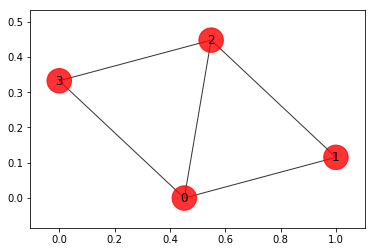

In [3]:
N =4 # Number of nodes in graph

G=nx.Graph()
G.add_nodes_from(np.arange(0,N,1))
elist=[(0,1,1.0),(0,2,1.0),(0,3,1.0),(1,2,1.0),(2,3,1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ['r' for node in G.nodes()]
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8)

In [4]:
# Making the weight matrix from the graph
w = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight'] 

### Brute force approach

Try all possible $2^N$ combinations. For N = 4 as in this example this is only 16 combinations but for N = 1000 this is 1.071509e+30 which is impractical for a classical computer. 

case = [0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0] cost = 3.0
case = [0, 1, 0, 0] cost = 2.0
case = [1, 1, 0, 0] cost = 3.0
case = [0, 0, 1, 0] cost = 3.0
case = [1, 0, 1, 0] cost = 4.0
case = [0, 1, 1, 0] cost = 3.0
case = [1, 1, 1, 0] cost = 2.0
case = [0, 0, 0, 1] cost = 2.0
case = [1, 0, 0, 1] cost = 3.0
case = [0, 1, 0, 1] cost = 4.0
case = [1, 1, 0, 1] cost = 3.0
case = [0, 0, 1, 1] cost = 3.0
case = [1, 0, 1, 1] cost = 2.0
case = [0, 1, 1, 1] cost = 3.0
case = [1, 1, 1, 1] cost = 0.0


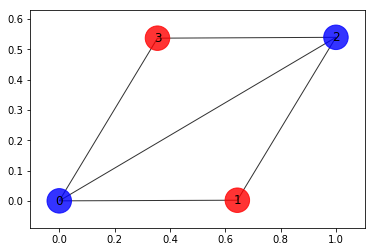


Best solution = [1, 0, 1, 0] cost = 4.0


In [5]:
n = N # number of qubits  


best_cost = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost < cost:
        best_cost = cost
        xbest = x 
    
    print("case = " + str(x)+ " cost = " + str(cost))

colors = []
for i in range(n):
    if xbest[i] == 0:
        colors.append('r')
    else:
        colors.append('b')
nx.draw_networkx(G, node_color=colors, node_size=600, alpha = .8)
plt.show()
print("\nBest solution = " +str(xbest)+ " cost = " + str(best_cost))    

### Mapping to the Ising problem

In [6]:
# first determine the shift 
pauli_list = []
cost_shift = 0
for i in range(n):
        for j in range(i):
            if w[i,j] != 0:
                cost_shift = cost_shift + w[i,j]
                wp = np.zeros(n)
                vp = np.zeros(n)
                vp[i] = 1
                vp[j] = 1
                pauli_list.append((w[i,j],Pauli(vp,wp)))
cost_shift

5.0

### Running it on quantum computer

In [7]:
#Making the Hamiltonian in its full form and getting the lowest eigenvalue and egienvector
H = make_Hamiltonian(pauli_list)
we, ve = la.eigh(H, eigvals=(0, 1))
exact = we[0]
exact_maxcut = -we[0]/2+cost_shift/2
print(exact_maxcut)
print(exact)

4.0
-3.0


In [8]:
#Setting up a quantum program and connecting to the Quantum Experience API
Q_program = QuantumProgram()
# set the APIToken and API url
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"])

True

calibration step # 0 of 25
calibration step # 5 of 25
calibration step # 10 of 25
calibration step # 15 of 25
calibration step # 20 of 25
calibrated SPSA_parameters[0] is 0.485441194935
SPSA parameters = [ 0.48544119  0.01        0.602       0.101       0.        ]
Energy at theta+ for step # 0
0.743773528888
Energy at theta- for step # 0
0.72711830546
Energy at theta+ for step # 20
-1.97523424463
Energy at theta- for step # 20
-1.99145511818
Energy at theta+ for step # 40
-2.37746016415
Energy at theta- for step # 40
-2.40672059004
Energy at theta+ for step # 60
-2.73527921029
Energy at theta- for step # 60
-2.71985474982
Energy at theta+ for step # 80
-2.93223653733
Energy at theta- for step # 80
-2.9271671186
Energy at theta+ for step # 100
-2.97440245739
Energy at theta- for step # 100
-2.97422376476
Energy at theta+ for step # 120
-2.98920928801
Energy at theta- for step # 120
-2.98699388445
Energy at theta+ for step # 140
-2.99544123758
Energy at theta- for step # 140
-2.99414344

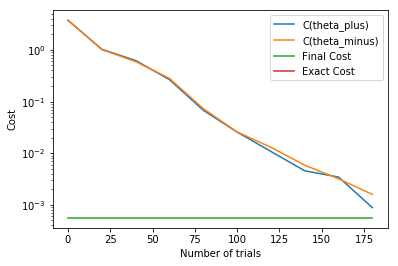

In [9]:
# Testing a trial funciton ry state input

# Quantum circuit parameters
entangler_map = {0: [1], 1: [2], 2: [3]} # the map of two-qubit gates with control at key and target at values
device = 'local_qasm_simulator' # the device to run on

# Numerical parameters 
max_trials = 200;
max_depth = 3
n = 4 # the number of qubits 
initial_theta=np.random.randn(max_depth*n)
shots = 1 
save_step = 20

if shots == 1:
    obj_funct_partial = partial(obj_funct, Q_program, H, n, max_depth, device, shots)
else:
    obj_funct_partial = partial(obj_funct, Q_program, pauli_list, n, max_depth, device, shots)

initial_c=0.01
target_update=2*np.pi*0.1
SPSA_parameters=SPSA_calibration(obj_funct_partial,initial_theta,initial_c,target_update,25)
print ("SPSA parameters = " + str(SPSA_parameters))

output = SPSA_optimization(obj_funct_partial, initial_theta, SPSA_parameters, max_trials, save_step)

plt.plot(np.arange(0, max_trials,save_step),output[2]-exact*np.ones(max_trials//save_step),label='C(theta_plus)')
plt.plot(np.arange(0, max_trials,save_step),output[3]-exact*np.ones(max_trials//save_step),label='C(theta_minus)')
plt.plot(np.arange(0, max_trials,save_step),(np.ones(max_trials//save_step)*output[0])-exact*np.ones(max_trials//save_step), label='Final Cost')
plt.plot(np.arange(0, max_trials,save_step),np.ones(max_trials//save_step)*0, label='Exact Cost')
plt.legend()
plt.xlabel('Number of trials')
plt.ylabel('Cost')
plt.yscale('log')

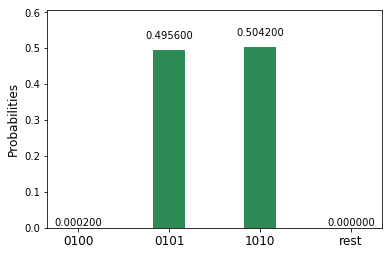

In [10]:
shots = 5000
circuits = ["final_circuit"]   
Q_program.add_circuit("final_circuit", trial_circuit_ry(n, max_depth, output[1], entangler_map,None,True))
Q_program.execute(circuits, device, shots)
data = Q_program.get_counts("final_circuit")
plot_histogram(data,5)

## Traveling Salesman for 4 cities (9 qubits)

For the second problem we consider the traveling salesman problem on 4 cities. In this case there are (N-1)! two different combinations.

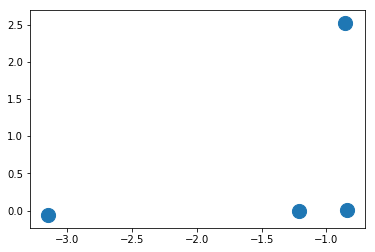

In [11]:
# choosing the cities 
N = 4
xc = (np.random.rand(N)-0.5)*10
yc = (np.random.rand(N)-0.5)*10

plt.scatter(xc, yc, s=200)
plt.show()

In [12]:
# getting the distances 
w = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        w[i,j]= np.sqrt((xc[i]-xc[j])**2+(yc[i]-yc[j])**2)

### Brute force approach

The brute force approach is to try all permutations. The number of permutations of N cities is (N-1)! which for 

N = 4 # paths = 6

N = 8 # paths = 5040

N = 16 # paths = 1.3076744e+12

order = (0, 1, 2, 3) Distance = 8.28854416283
order = (0, 1, 3, 2) Distance = 9.32502963608
order = (0, 2, 1, 3) Distance = 8.69637669571
order = (0, 2, 3, 1) Distance = 9.32502963608
order = (0, 3, 1, 2) Distance = 8.69637669571
order = (0, 3, 2, 1) Distance = 8.28854416283


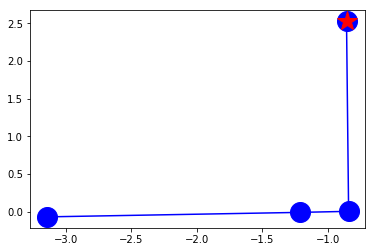

Best order = (0, 1, 2, 3) and distance = 8.28854416283


In [13]:
a=list(permutations(range(1,N)))
last_best_distance = 10000000
for i in a:
    distance = 0 
    pre_j = 0
    for j in i:
        distance = distance + w[j,pre_j]
        pre_j = j
    distance = distance + w[0,pre_j]
    order = (0,) + i
    if distance < last_best_distance:
        best_order = order
        last_best_distance = distance
    print("order = " + str(order) + " Distance = " + str(distance))

best_distance_brute = last_best_distance
best_order_brute = best_order

plt.scatter(xc, yc)
xbest = np.array([xc[i] for i in best_order_brute])
ybest = np.array([yc[i] for i in best_order_brute])
plt.plot(xbest, ybest, 'b.-', ms = 40)
plt.plot(xc[0], yc[0], 'r*', ms = 20)
plt.show()
print("Best order = " + str(best_order_brute) + " and distance = " + str(best_distance_brute))

### Mapping to binary bits

Recall the cost function is of the form 

$$C(\textbf{x})=\sum_{(i,j)\in E}w_{ij}\sum_{p=1}^{N-2} x_{i,p}x_{j,p+1}+\sum_{(0,j)\in E}w_{0j} x_{j,1}+\sum_{(i,0)\in E}w_{i0} x_{i,N-1}+ A\sum_{p=1}^{N-1}\left(1- \sum_{i=1}^{N-1} x_{i,p}\right)^2+A\sum_i\left(1- \sum_{p=1}^{N-1} x_{i,p}\right)^2 $$

In [14]:
n=(N-1)**2 # number of qubits
A = np.max(w)*100 # A parameter of cost function

wsave = w[1:N,1:N]
shift = np.zeros([N-1,N-1])
shift = la.toeplitz([0,1,0], [1,1,0])/2

firststep = np.zeros([N-1])
firststep[0] = 1;
laststep = np.zeros([N-1])
laststep[N-2] = 1;

Q = np.kron(shift,wsave) + np.kron(A*np.ones((N-1, N-1)), np.identity(N-1)) + np.kron(np.identity(N-1),A*np.ones((N-1, N-1)))
G = np.kron(firststep,w[0,1:N]) + np.kron(laststep,w[1:N,0]) - 4*A*np.kron(np.ones(N-1),np.ones(N-1))
M = 2*A*(N-1)

fun = lambda x: np.dot(np.around(x),np.dot(Q,np.around(x)))+np.dot(G,np.around(x))+M

def get_order_tsp(x):
    order = [0]
    for p in range(N-1):
        for j in range(N-1):
            if x[(N-1)*j+p]==1:
                order.append(j+1)
    return order

def get_x_tsp(order):
    x = np.zeros((len(order)-1)**2)
    for j in range(1,len(order)):
        p=order[j]
        x[(N-1)*(j-1)+(p-1)]=1
    return x

In [15]:
Iv = np.ones(n)
zo = np.zeros(n)

xopt =get_x_tsp(best_order_brute)
 
print(np.dot(xopt,np.dot(Q,xopt))+np.dot(G,xopt)+M)
print(np.dot(Iv,np.dot(Q,Iv))+np.dot(G,Iv)+M)
print(np.dot(zo,np.dot(Q,zo))+np.dot(G,zo)+M)
for i in range(100000):
    rd =  np.random.randint(2, size=n)
    if np.dot(rd,np.dot(Q,rd))+np.dot(G,rd)+M < (best_distance_brute-0.0001):
        print(np.dot(rd,np.dot(Q,rd))+np.dot(G,rd)+M)

8.28854416283
8340.26886074
2076.1802786


In [16]:
# stupid simulated annealing. NOT Complete
initial_x = np.random.randint(2, size=n)

cost = fun(initial_x)
x = np.copy(initial_x)
alpha = 0.999
temp = 10
for j in range(10000):
    flip=np.random.randint(len(x))
    new_x = np.copy(x)
    new_x[flip]=(x[flip]+1)%2
    new_cost=fun(new_x)
    if new_cost < cost:
        x = np.copy(new_x)
        cost = new_cost
    temp= temp*alpha
print("distance = " + str(cost) + " x_solution = " + str(x) + " temp = " + str(temp))

distance = 8.69637669571 x_solution = [0 1 0 1 0 0 0 0 1] temp = 0.00045173345977048254


In [17]:
print(get_order_tsp(x))
print(x)

[0, 2, 1, 3]
[0 1 0 1 0 0 0 0 1]


### Mapping to Z variables

In [18]:
Qz = (Q/4)
Gz =( -G/2-np.dot(Iv,Q/4)-np.dot(Q/4,Iv))
Mz = (M+np.dot(G/2,Iv)+np.dot(Iv,np.dot(Q/4,Iv)))

Mz = Mz + np.trace(Qz)
Qz = Qz - np.diag(np.diag(Qz))

#x = (1-z)/2
# z = -2x+1
z= -2*xopt+Iv
print(np.dot(z,np.dot(Qz,z))+np.dot(Gz,z)+Mz)
print(np.dot(-Iv,np.dot(Qz,-Iv))+np.dot(Gz,-Iv)+Mz)
print(np.dot(Iv,np.dot(Qz,Iv))+np.dot(Gz,Iv)+Mz)
for i in range(1000):
    rd =  1-2*np.random.randint(2, size=n)
    if np.dot(rd,np.dot(Qz,rd))+np.dot(Gz,rd)+Mz < (best_distance_brute-0.0001):
        print(np.dot(rd,np.dot(Qz,rd))+np.dot(Gz,rd)+Mz)

8.28854416283
8340.26886074
2076.1802786


In [19]:
# gettting the Hamiltonian 
pauli_list = []
for i in range(n):
    if Gz[i] != 0:
        wp = np.zeros(n)
        vp = np.zeros(n)
        vp[i] = 1
        pauli_list.append((Gz[i],Pauli(vp,wp)))
for i in range(n):
    for j in range(i):
        if Qz[i,j] != 0:
            wp = np.zeros(n)
            vp = np.zeros(n)
            vp[i] = 1
            vp[j] = 1
            pauli_list.append((2*Qz[i,j],Pauli(vp,wp)))

In [20]:
H = make_Hamiltonian(pauli_list)
we, v = la.eigh(H, eigvals=(0,0))
exact = we[0]
print(exact)
print(exact+Mz)

-2081.04670968
8.28854416283


In [21]:
#Setting up a quantum program and connecting to the Quantum Experience API
Q_program = QuantumProgram()
# set the APIToken and API url
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"])

True

calibration step # 0 of 25
calibration step # 5 of 25
calibration step # 10 of 25
calibration step # 15 of 25
calibration step # 20 of 25
calibrated SPSA_parameters[0] is 0.000855125026281
SPSA parameters = [ 0.00085513  0.01        0.602       0.101       0.        ]
Energy at theta+ for step # 0
279.714583293
Energy at theta- for step # 0
286.133719824
Energy at theta+ for step # 50
-1070.7228344
Energy at theta- for step # 50
-1075.94661504
Energy at theta+ for step # 100
-1564.70475302
Energy at theta- for step # 100
-1560.01211603
Energy at theta+ for step # 150
-1697.35877002
Energy at theta- for step # 150
-1700.051742
Energy at theta+ for step # 200
-1720.00291395
Energy at theta- for step # 200
-1720.66868139
Energy at theta+ for step # 250
-1727.12763127
Energy at theta- for step # 250
-1727.10087705
Energy at theta+ for step # 300
-1730.30912505
Energy at theta- for step # 300
-1730.86934676
Energy at theta+ for step # 350
-1732.37073044
Energy at theta- for step # 350
-1732

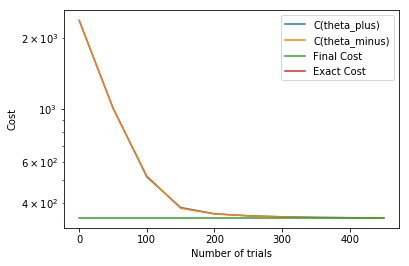

In [22]:
# Testing a trial funciton ry state input

# Quantum circuit parameters
entangler_map = {0: [1], 1: [2], 2: [3], 3: [4], 4: [5], 5: [6], 6: [7], 7: [8]} # the map of two-qubit gates with control at key and target at values
device = 'local_qasm_simulator' # the device to run on

# Numerical parameters 
max_trials = 500;
max_depth = 3
save_step = 50
n = 9 # the number of qubits 
initial_theta=np.random.randn(max_depth*n)
shots = 1 

if shots == 1:
    obj_funct_partial = partial(obj_funct, Q_program, H, n, max_depth, device, shots)
else:
    obj_funct_partial = partial(obj_funct, Q_program, pauli_list, n, max_depth, device, shots)

initial_c=0.01
target_update=2*np.pi*0.1
SPSA_parameters=SPSA_calibration(obj_funct_partial,initial_theta,initial_c,target_update,25)
print ("SPSA parameters = " + str(SPSA_parameters))    
    
output = SPSA_optimization(obj_funct_partial, initial_theta, SPSA_parameters, max_trials, save_step)
plt.plot(np.arange(0, max_trials,save_step),output[2]-exact*np.ones(max_trials//save_step),label='C(theta_plus)')
plt.plot(np.arange(0, max_trials,save_step),output[3]-exact*np.ones(max_trials//save_step),label='C(theta_minus)')
plt.plot(np.arange(0, max_trials,save_step),(np.ones(max_trials//save_step)*output[0])-exact*np.ones(max_trials//save_step), label='Final Cost')
plt.plot(np.arange(0, max_trials,save_step),np.ones(max_trials//save_step)*0, label='Exact Cost')
plt.legend()
plt.xlabel('Number of trials')
plt.ylabel('Cost')
plt.yscale('log')

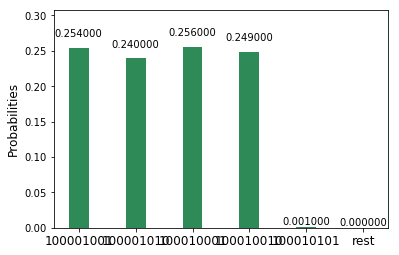

In [23]:
shots = 1000
circuits = ["final_circuit"]   
Q_program.add_circuit("final_circuit", trial_circuit_ry(n, max_depth, output[1], entangler_map,None,True))
Q_program.execute(circuits, device, shots)
data = Q_program.get_counts("final_circuit")
plot_histogram(data,5)

In [24]:
max_value = max(data.values())  # maximum value
max_keys = [k for k, v in data.items() if v == max_value] # getting all keys containing the `maximum`
quantum_order = get_order_tsp(list(map(int, reversed(max_keys[0]))))

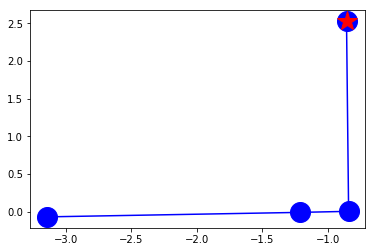

In [25]:
plt.scatter(xc, yc)
xbest = np.array([xc[i] for i in quantum_order])
ybest = np.array([yc[i] for i in quantum_order])
plt.plot(xbest, ybest, 'b.-', ms = 40)
plt.plot(xc[0], yc[0], 'r*', ms = 20)
plt.show()